In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import LinearSVC as LS
from sklearn.linear_model import Ridge as R
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.neural_network import MLPRegressor as MLPR
from sklearn.cluster import KMeans as K
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsc-ctetw21/sample_submission.csv
/kaggle/input/tsc-ctetw21/StudentClueFeatures.csv
/kaggle/input/tsc-ctetw21/train.csv
/kaggle/input/tsc-ctetw21/test.csv


## Welcome to Victor Krum's Kickstart Solution
As you might be knowing Victor Krum isnt one of the brightest, but he has been tagging along with BackPage for a while now, so this notebook should help you to get started


*WHISTLE*

## Lets Check The Data!
Lets read the csvs in Pandas, check out the fields and basic statistics

In [2]:
#Features
df_fts = pd.read_csv("/kaggle/input/tsc-ctetw21/StudentClueFeatures.csv")
df_fts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8264276 entries, 0 to 8264275
Data columns (total 16 columns):
 #   Column          Dtype
---  ------          -----
 0   StudentID       int64
 1   ClueFeature_1   int64
 2   ClueFeature_2   int64
 3   ClueFeature_3   int64
 4   ClueFeature_4   int64
 5   ClueFeature_5   int64
 6   ClueFeature_6   int64
 7   ClueFeature_7   int64
 8   ClueFeature_8   int64
 9   ClueFeature_9   int64
 10  ClueFeature_10  int64
 11  ClueFeature_11  int64
 12  ClueFeature_12  int64
 13  ClueFeature_13  int64
 14  ClueFeature_14  int64
 15  ClueFeature_15  int64
dtypes: int64(16)
memory usage: 1008.8 MB


In [3]:
df_fts.describe()

,StudentID,ClueFeature_1,ClueFeature_2,ClueFeature_3,ClueFeature_4,ClueFeature_5,ClueFeature_6,ClueFeature_7,ClueFeature_8,ClueFeature_9,ClueFeature_10,ClueFeature_11,ClueFeature_12,ClueFeature_13,ClueFeature_14,ClueFeature_15
count,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06,8.264276e+06
mean,4.430585e+06,1.655369e+01,7.542387e+00,3.830105e+00,1.667869e+01,7.706172e+00,3.930837e+00,1.676028e+01,7.816880e+00,3.955483e+00,1.685398e+01,7.913082e+00,3.974547e+00,1.219012e+01,-7.865214e+01,4.285730e+00
std,2.561384e+06,1.398017e+01,1.007709e+01,8.465879e+00,1.390630e+01,1.009423e+01,8.487428e+00,1.385820e+01,1.012862e+01,8.506840e+00,1.381624e+01,1.016046e+01,8.529097e+00,3.787982e+00,8.953294e+01,1.151020e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.170000e+02,-1.300000e+01
25%,2.212867e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,-1.770000e+02,-2.000000e+00
50%,4.436442e+06,2.000000e+01,2.000000e+00,0.000000e+00,2.000000e+01,3.000000e+00,0.000000e+00,2.000000e+01,3.000000e+00,0.000000e+00,2.100000e+01,3.000000e+00,0.000000e+00,1.500000e+01,-4.100000e+01,0.000000e+00
75%,6.650953e+06,3.100000e+01,1.100000e+01,2.000000e+00,3.100000e+01,1.200000e+01,2.000000e+00,3.100000e+01,1.200000e+01,2.000000e+00,3.100000e+01,1.200000e+01,2.000000e+00,1.500000e+01,0.000000e+00,7.000000e+00
max,8.874626e+06,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,3.100000e+01,1.500000e+01,8.000000e+01,3.500000e+01


In [8]:
#Train, Test
train = pd.read_csv("/kaggle/input/tsc-ctetw21/train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70647802 entries, 0 to 70647801
Data columns (total 4 columns):
 #   Column         Dtype
---  ------         -----
 0   PairID         int64
 1   Student1_ID    int64
 2   Student2_ID    int64
 3   Collaboration  int64
dtypes: int64(4)
memory usage: 2.1 GB


In [7]:
test = pd.read_csv("/kaggle/input/tsc-ctetw21/test.csv")

Checking for any blank entries in Test,Train and Features 

In [5]:
df_fts.isnull().sum()

StudentID         0
ClueFeature_1     0
ClueFeature_2     0
ClueFeature_3     0
ClueFeature_4     0
ClueFeature_5     0
ClueFeature_6     0
ClueFeature_7     0
ClueFeature_8     0
ClueFeature_9     0
ClueFeature_10    0
ClueFeature_11    0
ClueFeature_12    0
ClueFeature_13    0
ClueFeature_14    0
ClueFeature_15    0
dtype: int64

In [9]:
train.isnull().sum()

PairID           0
Student1_ID      0
Student2_ID      0
Collaboration    0
dtype: int64

In [10]:
test.isnull().sum()

PairID         0
Student1_ID    0
Student2_ID    0
dtype: int64

No Blank Entry Found

In [11]:
train.describe()

,PairID,Student1_ID,Student2_ID,Collaboration
count,7.064780e+07,7.064780e+07,7.064780e+07,7.064780e+07
mean,3.532390e+07,4.314863e+06,4.358042e+06,3.184507e-02
std,2.039426e+07,2.546287e+06,2.552766e+06,1.755875e-01
min,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00
25%,1.766195e+07,2.166775e+06,2.174040e+06,0.000000e+00
50%,3.532390e+07,4.439662e+06,4.439199e+06,0.000000e+00
75%,5.298585e+07,6.603877e+06,6.610564e+06,0.000000e+00
max,7.064937e+07,8.556563e+06,8.874626e+06,1.000000e+00


### Inference
Hmm, So there are a lot of 0s and lesser 1s, makes sense not everyone collaborates with everyone!
This is just a beginners notebook so I will take a little data and show you how the submission is done!

In [12]:
#Take 5000 Collaborators :3
Collaborators = train[train['Collaboration']==1].sample(6000,replace=True)

#Take 5000 Honest ;-;
Honest = train[train['Collaboration']==0].sample(6000,replace=True)

#Join!
train = pd.concat([Collaborators, Honest]).sample(frac=1,replace=True)

### Now What ?
Now I need to replace the Student ID with their features, train an algorithm and then do the same thing for test and Voila!

In [13]:
#Lets take all the Student IDs Corresponding to the pairs!
Student1_ID = train['Student1_ID'].tolist()
Student2_ID = train['Student2_ID'].tolist()

tqdm is a nice python tool that wraps around loops and lets me know the amount of time remaining while I chat with Ms. Granger ;)

In [14]:
import tqdm
pair_fts = []
#Lets Loop
for s1, s2 in tqdm.tqdm(zip(Student1_ID, Student2_ID), total=len(train)):
    #Get features of Students with given IDs
    s1_fts, s2_fts = (
        df_fts[df_fts['StudentID']==s1],
        df_fts[df_fts['StudentID']==s2]
    )
    #Lets take out the Clue Features and drop the ID because how can you use the ID as data ?
    s1_fts, s2_fts = s1_fts.values[0][1:], s2_fts.values[0][1:]
    #Append these features after concatenation 
    #i.e. 15 Features of S1 and 15 of S2 to make 30 features for the pair
    pair_fts.append(np.concatenate([s1_fts, s2_fts]))

100%|██████████| 12000/12000 [03:04<00:00, 65.00it/s]


Great we get 30 features for the 12000 pairs, now lets model using Logistic regression (A classification parallel of Linear Regression)!

In [15]:
final_features = np.array(pair_fts)
print(final_features.shape)

(12000, 30)


In [16]:
from sklearn.model_selection import train_test_split as tts
#X = train_features, y = target_features
X = final_features

y = train['Collaboration']


Plotting a heatmap of correlation between features to check if we can eliminate any

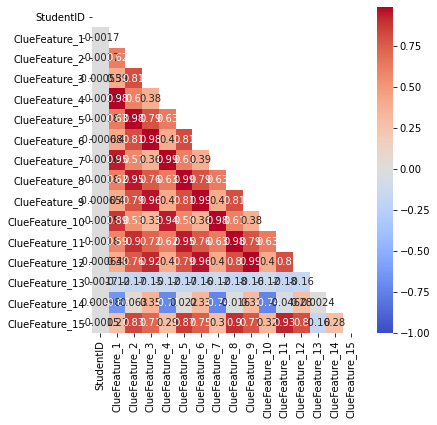

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=df_fts.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(6,6))
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True,mask=mask);

Retaining the features,No feature strongly correlated..

In [18]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

We can scale the data and apply PCA however on inspection it led to pretty bad result,so we will comment it out as of now,

In [ ]:
"""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print(X_train.shape)
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
"""

Optimum Hyperparameters for our model can be checked using GridsearchCV. Pipeline for the same can be made by scaling and pca,but we are avoiding that to save time and also because it doesn't change the result much(noticed in this case)

In [ ]:
"""
#std_slc = StandardScaler()
#pca = decomposition.PCA()

#from sklearn import neural_network
#mlp=neural_network.MLPClassifier()
#n_components = list(range(1,X.shape[1]+1,1))


#pipe = Pipeline(steps=[('std_slc', std_slc),'pca', pca),('mlp', mlp)])
#n_components = list(range(1,X.shape[1]+1,1))
#parameters = dict(mlp__alpha=alpha,mlp__activation=activation,mlp__hidden_layer_sizes=hidden_layer_sizes,mlp__max_iter=max_iter)
parameters=dict(mlp__hidden_layer_sizes=[4,5,6],

mlp__alpha =list(10.0 ** -np.arange(1, 6)),
mlp__activation=['logistic','relu','tanh',],
mlp__solver=['sgd','adam','lbfgs']
           ,mlp__max_iter=[1000,500])

      

                
parameters = {'solver': ['sgd','adam'], 
              'max_iter': [500,1000], 
              'alpha': 10.0 ** -np.arange(1, 4), 
              'hidden_layer_sizes':np.arange(4,6 ), 
              'random_state':[4,5]}
              learning_rate= 0.01, max_depth= 4, n_estimators=600, subsample= 0.6
"""
parameters={'learning_rate':[0.01,0.001,0.1],'max_depth':[5,8,13,4],'n_estimators'=[600,700,900],'subsample'=[0.6,0.8,0.9]}
                                                      

In [ ]:
#clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
#from sklearn.ensemble import GradientBoostingClassifier 
#GBC=GradientBoostingClassifier()
from sklearn.ensemble import BaggingClassifier 
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier 
clf_GS = GridSearchCV(GradientBoostingClassifier(), parameters,n_jobs=-1)
clf_GS.fit(X, y)
#grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
#grid_GBC.fit(X_train, y_train)


In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",clf_GS.best_estimator_)
print("\n The best score across ALL searched params:\n",clf_GS.best_score_)
print("\n The best parameters across ALL searched params:\n", clf_GS.best_params_)


In [19]:

from sklearn.linear_model import LogisticRegression 

from sklearn.neural_network import MLPClassifier as MLP
from sklearn import neural_network


from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.dummy import DummyClassifier as DC
from sklearn.gaussian_process import GaussianProcessClassifier

#model = LR(C=0.2682695795279725, class_weight=None, dual=False,
          #fit_intercept=True, intercept_scaling=1,l1_ratio=None, max_iter=10000,
          #multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          #solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
#model = DTC(class_weight=None, criterion='gini', max_depth=6,
            #max_features=None, max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, random_state=None,splitter='best')
            
        
#model=MLP(activation='logistic', alpha=0.001, hidden_layer_sizes=5,
              #max_iter=1500,random_state=5,solver='sgd',learning_rate='constant')

model=GBC(learning_rate= 0.01, max_depth= 4, n_estimators=600, subsample= 0.6)

#model=K()
#model=BaggingClassifier(DecisionTreeClassifier(),n_estimators=17,n_jobs=-1,random_state=3,warm_start=True)

model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=600,
                           subsample=0.6)

In [ ]:
Checking accuracy using KFold

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.778 (0.010)


Now we need to see how good this model is, Lets make an accuracy function

In [20]:
def accuracy(y_predict, y_true):
    total = len(y_predict)
    correct = sum(y_predict==y_true)
    return 100 * correct/total

In [21]:
y_predict=model.predict(X_test)
print("The Validation Accuracy is %0.2f percent" % accuracy(y_predict, y_test))

The Validation Accuracy is 76.21 percent


Thats quite close to a cute number :3, So let it be like that.


Now lets repeat this for the test set and submit our predictions!

First prepare test featuers

In [ ]:
#Lets take all the Student IDs Corresponding to the pairs!
Student1_ID = test['Student1_ID'].tolist()
Student2_ID = test['Student2_ID'].tolist()
pair_fts = []
#Lets Loop
for s1, s2 in tqdm.tqdm(zip(Student1_ID, Student2_ID), total=len(test)):
    #Get features of Students with given IDs
    s1_fts, s2_fts = (
        df_fts[df_fts['StudentID']==s1],
        df_fts[df_fts['StudentID']==s2]
    )
    #Lets take out the Clue Features and drop the ID because how can you use the ID as data ?
    s1_fts, s2_fts = s1_fts.values[0][1:], s2_fts.values[0][1:]
    #Append these features after concatenation 
    #i.e. 15 Features of S1 and 15 of S2 to make 30 features for the pair
    pair_fts.append(np.concatenate([s1_fts, s2_fts]))

In [ ]:
final_features = np.array(pair_fts)
print(final_features.shape)

Make Predictions

In [ ]:
DaPredictions = model.predict(final_features)

In [ ]:
my_submission = pd.read_csv("/kaggle/input/tsc-ctetw21/sample_submission.csv")
my_submission.head()

In [ ]:
my_submission["Collaboration"]=DaPredictions

In [ ]:
my_submission.head()

#### So this was a naive first attempt, now that we have DaPredictinons Lessssgo

In [ ]:
my_submission.to_csv("NeevSikka.csv", index=False)

## Submission

This submission goes to the output directory you can see it in the output -> kaggle -> working, click and download the file

Now I submit the file on the submit page and kaggle will evaulate it!
We got 72.72% on the public leaderboard!
Now be creative in your solutions! Hope this helped